# Lab 6 Community Detection
## Due: Midnight, March 31
In this lab, we will
1. **learn CPM community detection**
2. **Spectral Clustering based Community Detection (normalized cut)**
3. **Modularity Maximization based Community Detection**



## Save Your Notebook! 
- Click on File (upper left corner), Select “Save and Checkpoint”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save and Checkpoint often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- After download is complete, Click on File, Select “Download as” again, Choose PDF via Latex (.pdf)
- Submit both the Notebook file and the PDF File as your submission for Lab 6.

# 1. Preparation

## 1.1 Import the packages

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
from sklearn.cluster import SpectralClustering
from networkx.algorithms.community import greedy_modularity_communities

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## 1.2. Load Graph Data
Please download the file football.gml from Canvas and upload to Azure notebook. It contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.  The values are as follows:
- 0 = Atlantic Coast
- 1 = Big East
- 2 = Big Ten
- 3 = Big Twelve
- 4 = Conference USA
- 5 = Independents
- 6 = Mid-American
- 7 = Mountain West
- 8 = Pacific Ten
- 9 = Southeastern
- 10 = Sun Belt
- 11 = Western Athletic

We will try to detect commnities/conferences of each node based on the network.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


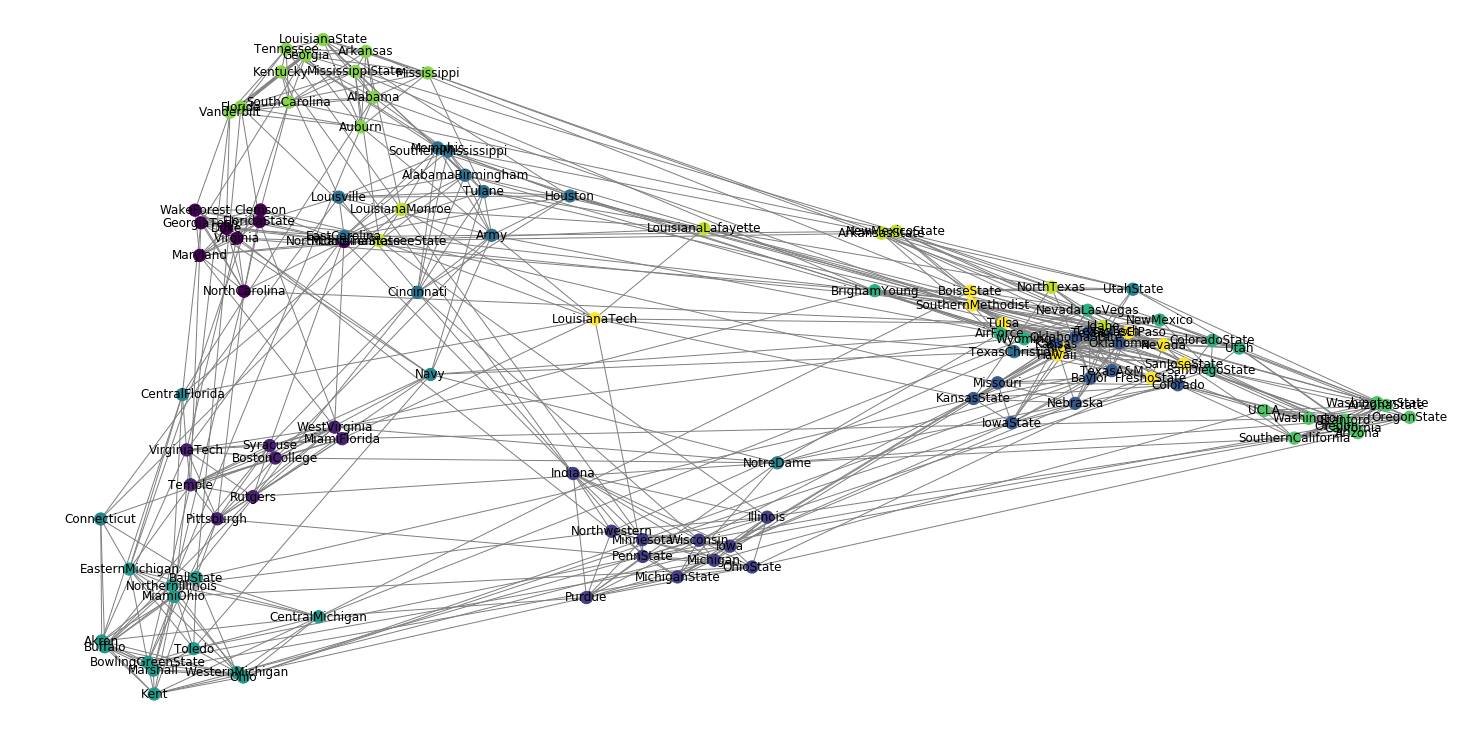

In [3]:
# The coloar of the node denote the conference it belongs to
%matplotlib inline
G = nx.read_gml(path='football.gml', label='label', destringizer=None)
plt.figure(1, figsize=(20,10))
pos = nx.spectral_layout(G, scale=50)
node_community_id = [int(node[1]) for node in G.nodes('value')]
nx.draw(G, pos, font_size=12, edge_color='gray', node_size=150, node_color=node_community_id, with_labels=True)
plt.show()

# 2. CPM for Community Detection
We will use the networkx implementation of CPM method for community detection, i.e., k_clique_communities(G, k, cliques=None), where G is the graph and k is the clique of size k we will find before constructing the clique graph. For more details, please refer to: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html#networkx.algorithms.community.kclique.k_clique_communities 

## Exercise 1
Please call the k_cique_communities with k=3 to find communities for the graph in Section 1. An example of calling k_clique_communities can be found in https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html#networkx.algorithms.community.kclique.k_clique_communities 

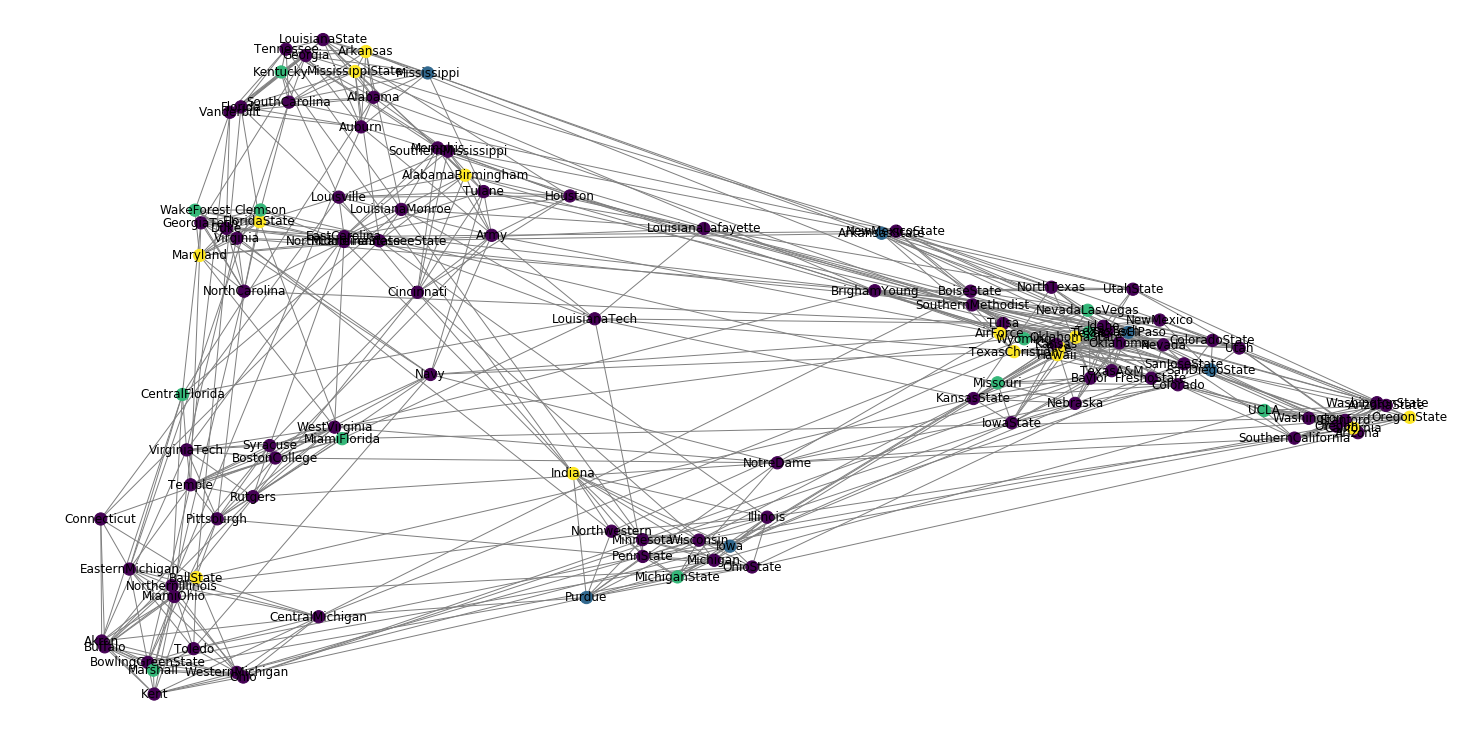

In [4]:
# TODO: Please fill in the missing codes
communities = list(k_clique_communities(G, k = 3))
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1 
for node in G.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(2, figsize=(20,10))
nx.draw(G, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=150, with_labels=True)
plt.show(block=True)

## Exercise 2
Compared with the graoundtruth shown in Section 1, CPM with k=3 doesn't give very good perforamnce. Now please vary K to detect better communities.

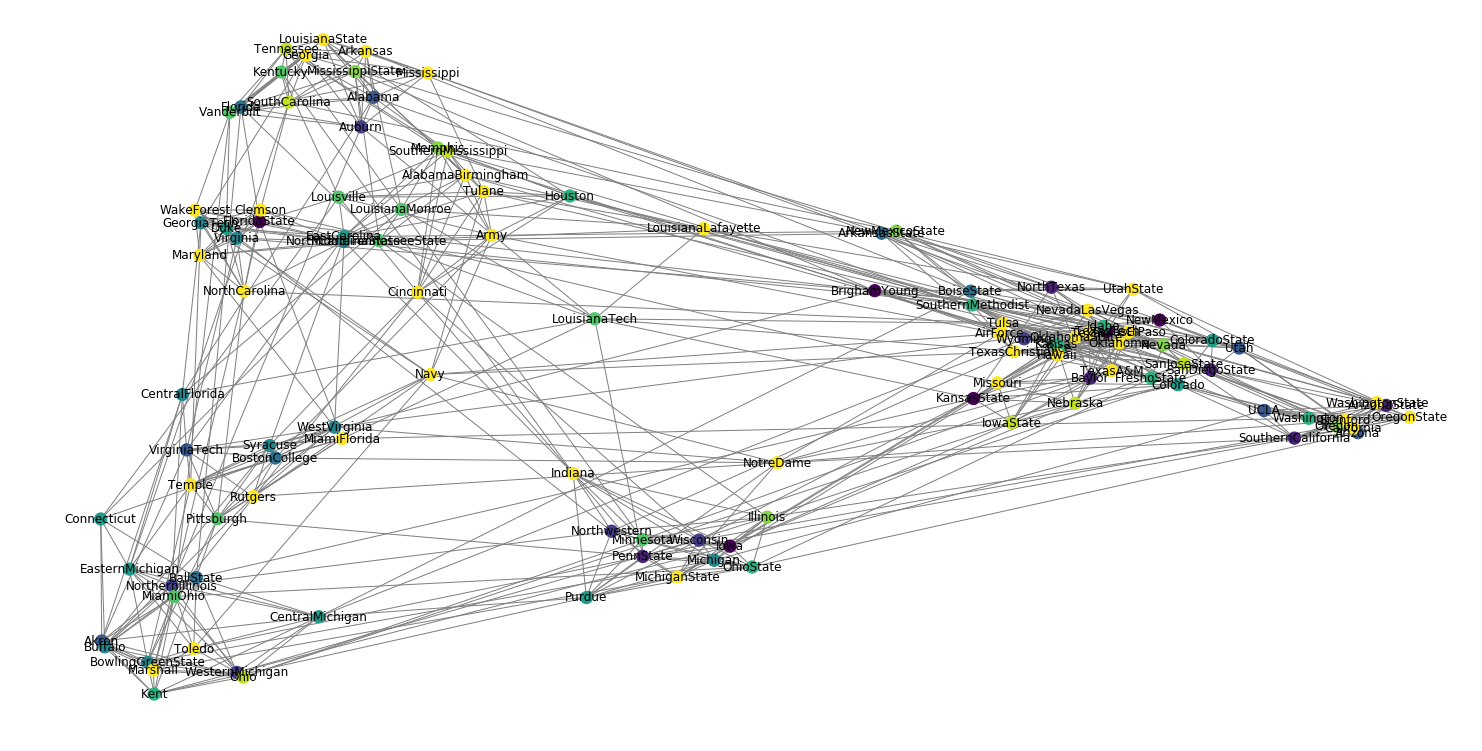

In [31]:
# TODO: Please vary K to detect better communities ????????????

communities = list(k_clique_communities(G, k = 6))
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1 
for node in G.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(2, figsize=(20,10))
nx.draw(G, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=150, with_labels=True)
plt.show(block=True)

# 3. Sepctral Clustering based Community Detection 
The ratio cut and normalized cut can be reformulated as spectral clustering by solving the following optimization problem
\begin{equation}
    \min_{\mathbf{X}} Tr(\mathbf{X}^T \mathbf{L} \mathbf{X}) \quad s.t. \quad \mathbf{X}^T \mathbf{X} = \mathbf{I}
\end{equation}
where for ratio cut
\begin{equation}
    \mathbf{L} = \mathbf{D} - \mathbf{A}
\end{equation}
and for ratio cut
where for normalized cut
\begin{equation}
    \mathbf{L} = \mathbf{I} - \mathbf{D}^{-1/2}\mathbf{A}\mathbf{D}^{-1/2}
\end{equation}
In other words, we can call the SpectralClustering of sklearn with the affinity matrix as the adjaency matrix of the graph to do community detection. In SpectralClustering(n_clusters=8, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None), we need to specify n_clusters as the number of communities we want to have and set affinity='precomputed'. For more details, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## Exercise 3
Please finish the following code for SpectralClustering based community detection

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


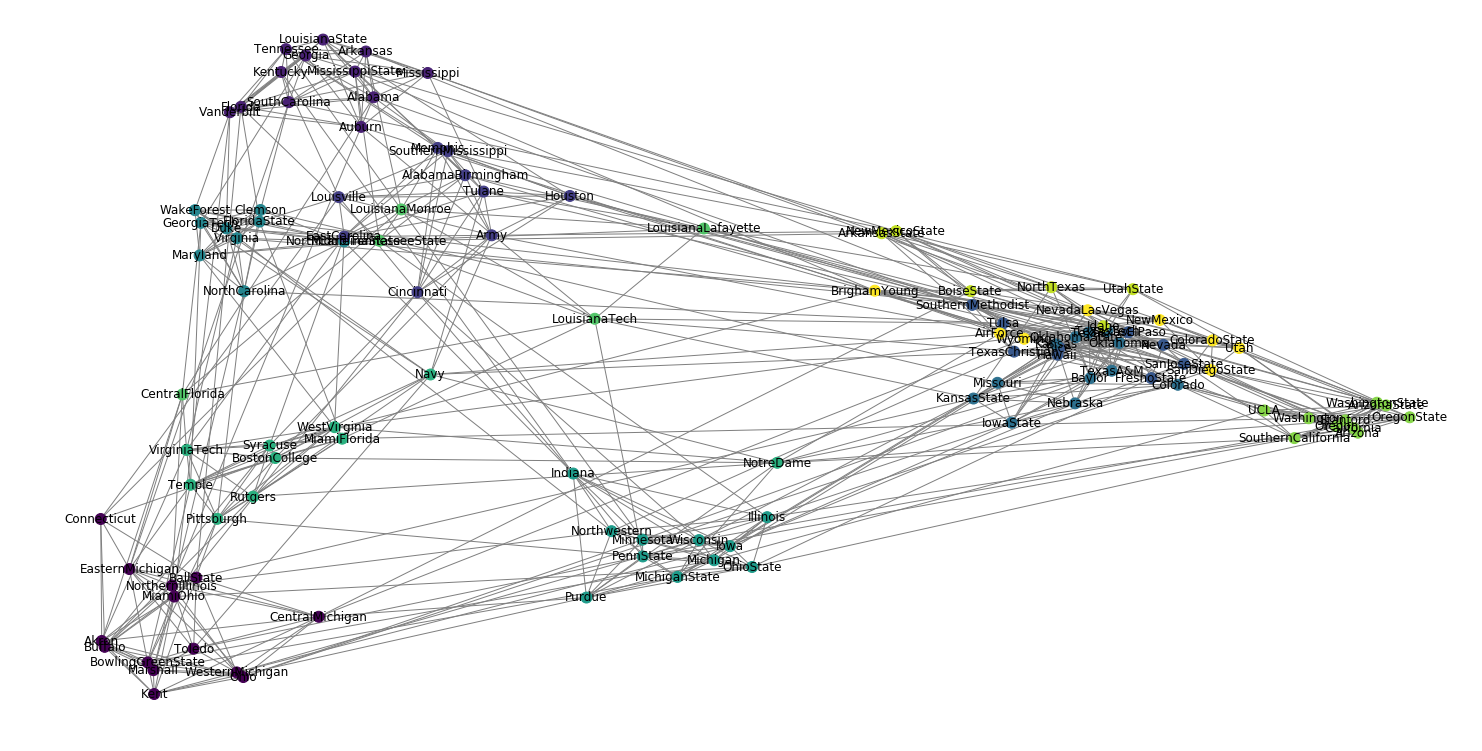

In [29]:
# Get adjacency-matrix as numpy-array, please call nx.to_numpy_matrix to get the adjeancy matrix of graph G
adj_mat = nx.to_numpy_matrix(G)

# Spectral Clustering Cluster
sc = SpectralClustering(12, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

plt.figure(3, figsize=(20,10))
nx.draw(G, pos, font_size=12, edge_color='gray', node_size=120, node_color=sc.labels_, with_labels=True)
plt.show()

# 4. Modularity based Community Detection
We will use the greedy_modularity_communities(G, weight=None) of network x for modularity based community detection. Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. For more details, please refer to: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html

## Exercise 5
Please finish the following code for modularity based community detection. Please call greedy_modularity_communities to find communities

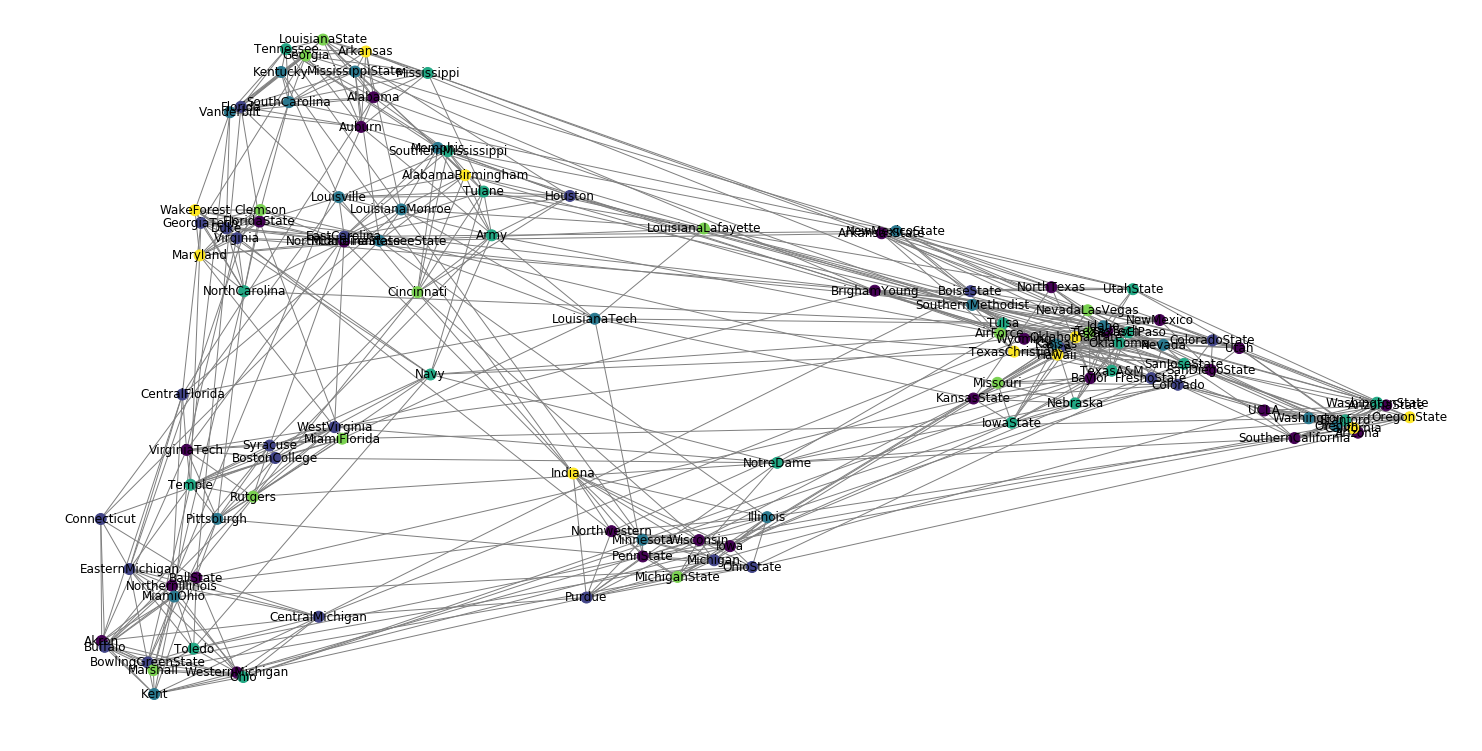

In [32]:
# TODO: please call greedy_modularity_communities to find communities
communities = list(greedy_modularity_communities(G))
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1
for node in G.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(4, figsize=(20,10))
nx.draw(G, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=120, with_labels=True)
plt.show(block=True)

ValueError: 'c' argument has 115 elements, which is not acceptable for use with 'x' with size 7, 'y' with size 7.

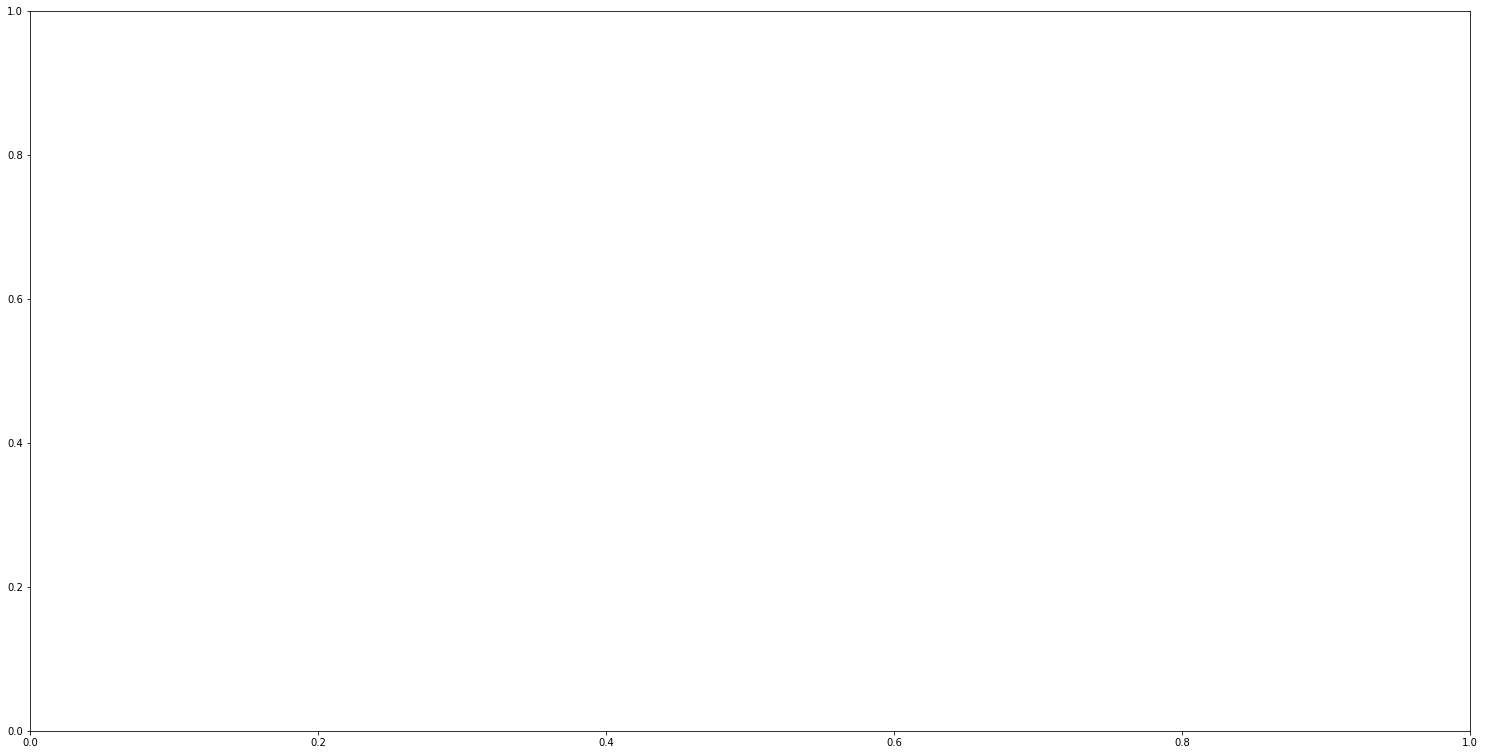

In [6]:
# TODO: please call greedy_modularity_communities to find communities
G3 = nx.read_edgelist(path='1b.edgelist', delimiter=' ', nodetype=int)

pos = nx.spectral_layout(G3, scale = 50)


communities = list(greedy_modularity_communities(G3))
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1
for node in G3.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(4, figsize=(20,10))
nx.draw(G3, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=120, with_labels=True)
plt.show(block=True)

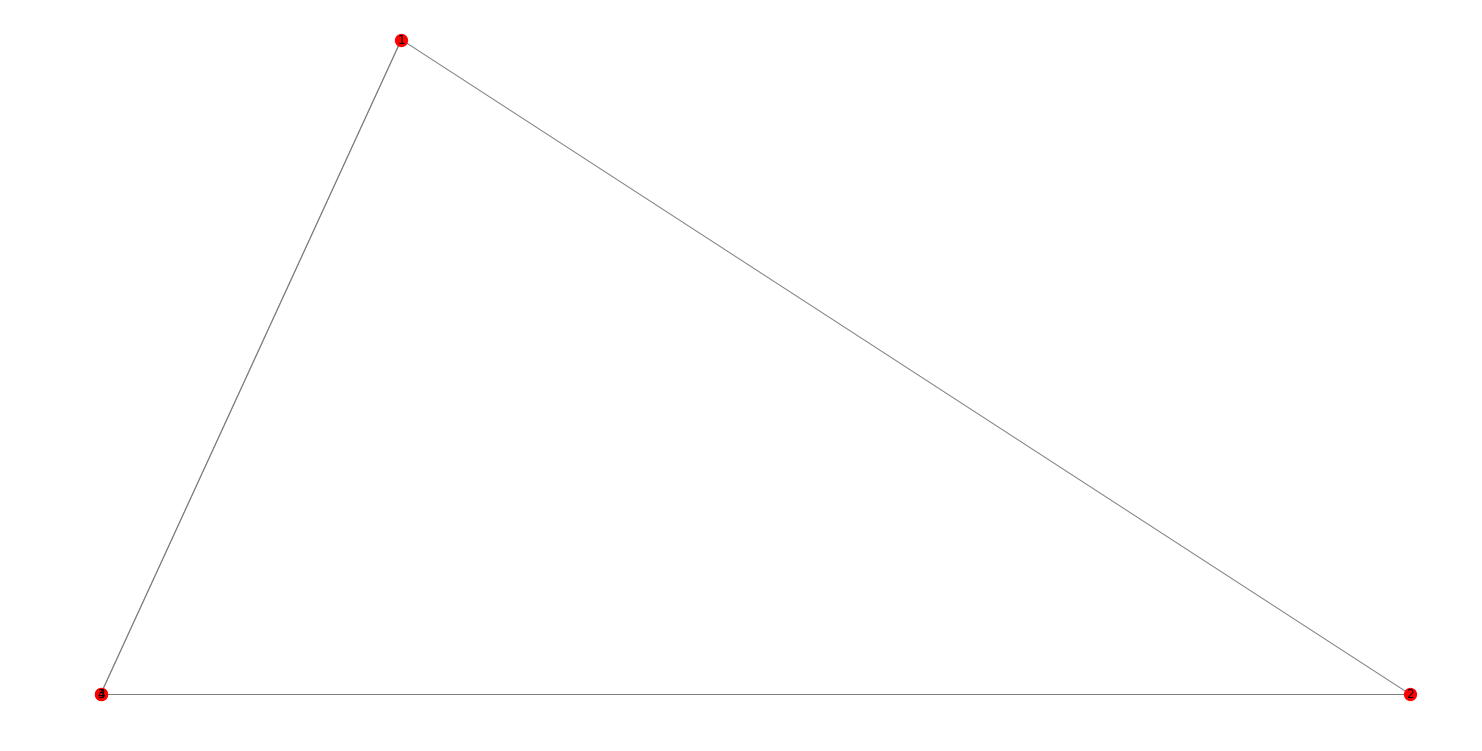

In [14]:
%matplotlib inline
G3 = nx.read_edgelist(path='1b.edgelist', delimiter=' ', nodetype=int)
plt.figure(1, figsize=(20,10))
pos = nx.spectral_layout(G3, scale=50)
nx.draw(G3, pos, font_size=12, edge_color='gray', node_size=150, with_labels=True)
plt.show()

# Exercise 6
Please download the kara_club.edgelist from Canvas, upload it to Azure. Use CPM method to detect communities and visualize it.

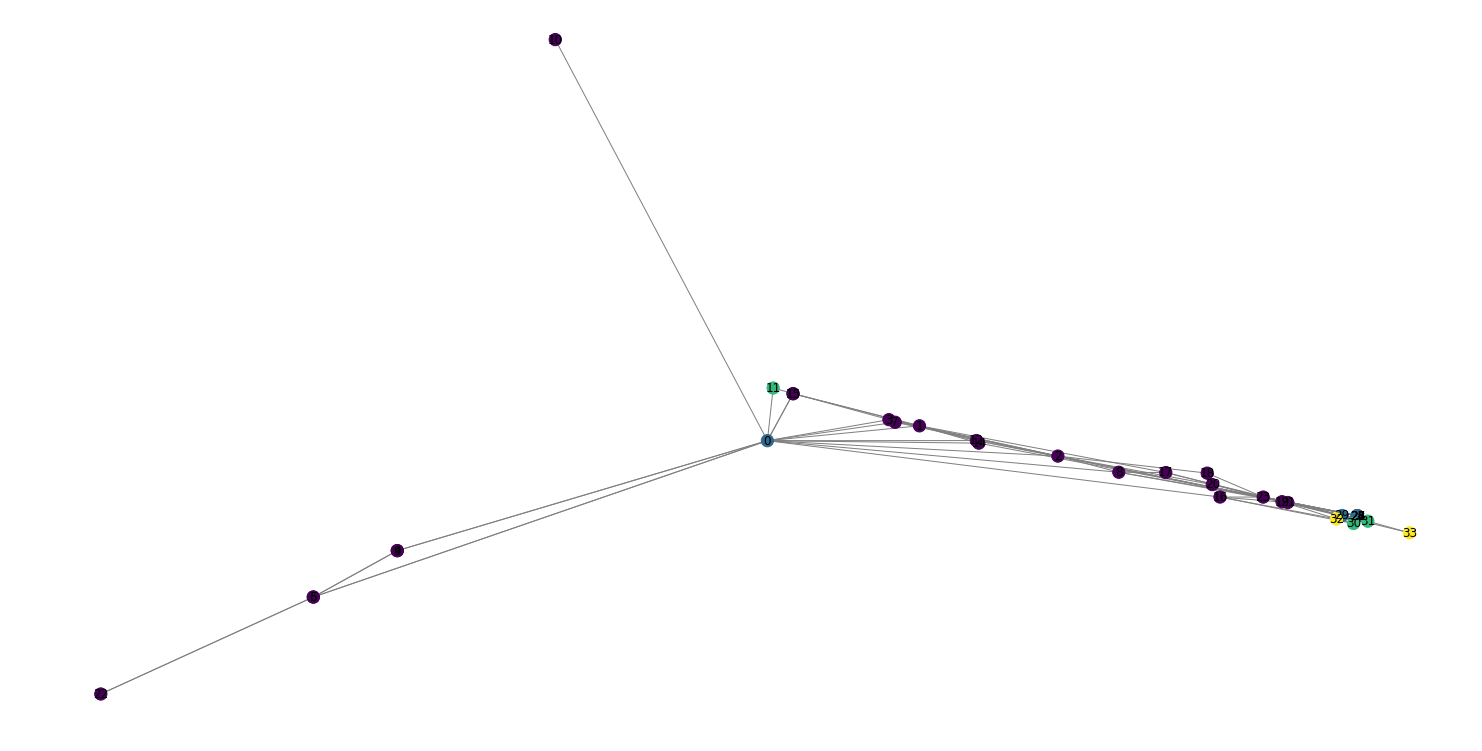

In [48]:
# TODO: Use CPM method to detect communities and visualize it
# You can refer to lab 4 and 5 to find code for importing edgelist to NetworkX. The function you will use is read_edgelist.

G2 = nx.read_edgelist(path='karate_club.edgelist', delimiter=' ', nodetype=int)

pos = nx.spectral_layout(G2, scale = 50)

communities = list(k_clique_communities(G2, k = 3))
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1 
for node in G2.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(2, figsize=(20,10))
nx.draw(G2, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=150, with_labels=True)
plt.show(block=True)